In [2]:
#Linear Regression with California Housing Dataset.
#1. Load the dataset, display basic statistics, and perform initial exploration.

#1.1 Load the dataset and perform initial exploration.
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#1.2 Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

In [4]:
#1.3 Display basic stats
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

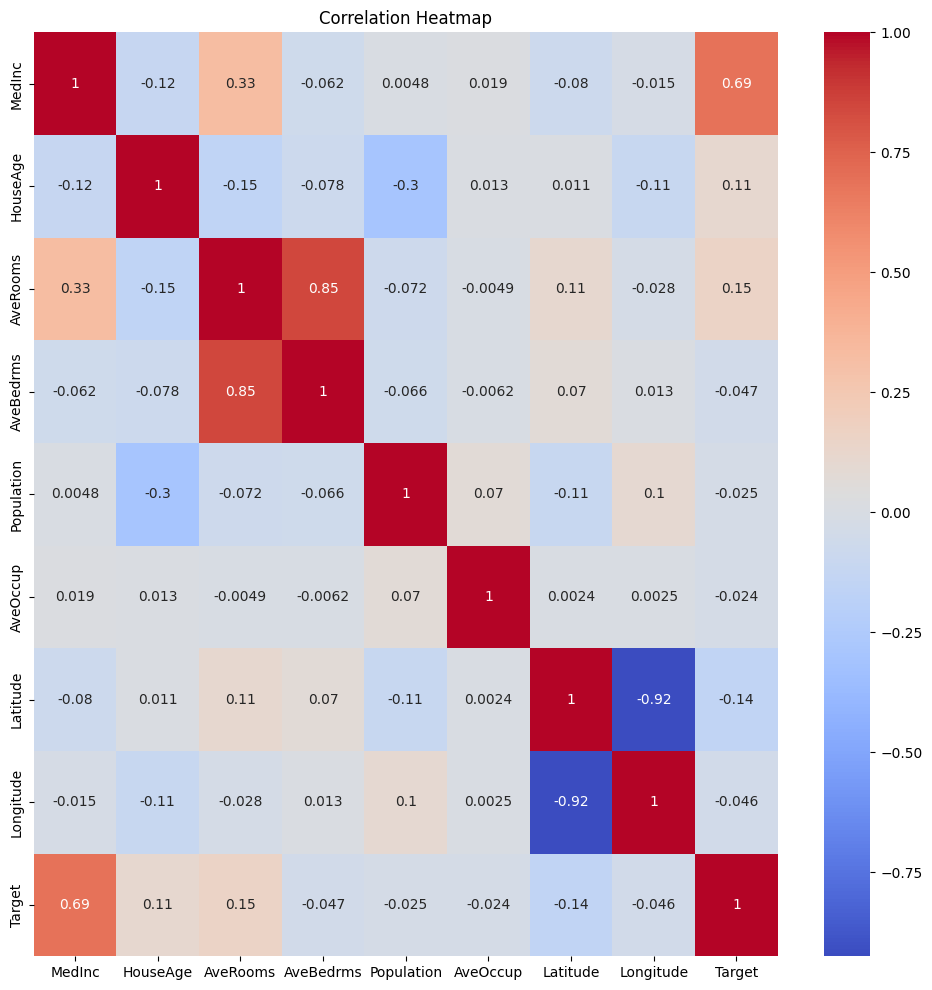

In [5]:
# 2. Visualize relationships
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# 3. Split dataset and train Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.drop("Target", axis=1)
y = df["Target"]

#3.1 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3.2 Train model
model = LinearRegression()
model.fit(X_train, y_train)

#3.3 Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

#3.4 Predictions and metrics
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: -37.02327770606409
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


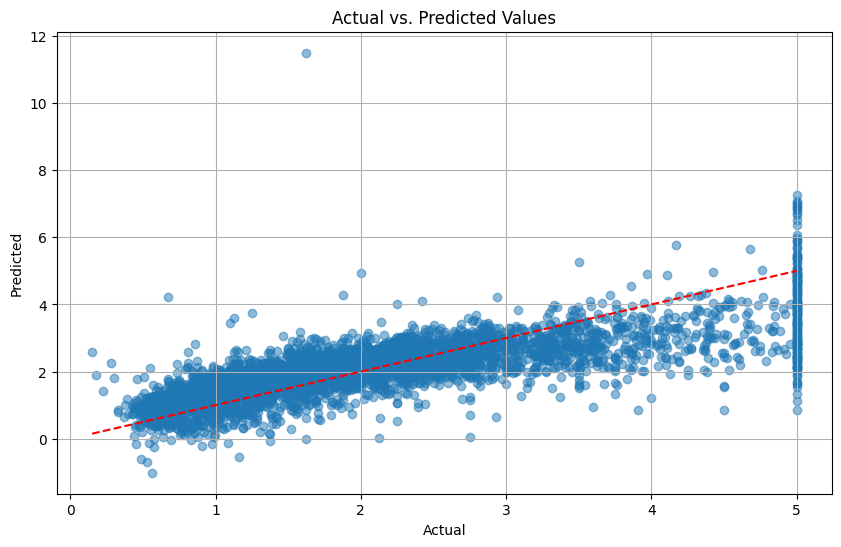

In [7]:
# 4. Plot predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

#This model performs well because the predicted values are tightly clustered along the diagonal (red dashed) line, showing that predictions closely match the actual values.

In [8]:
#5. Improve the model
#5.1 Select top correlated features
correlation = df.corr()
top_features = correlation["Target"].abs().sort_values(ascending=False).index[1:5]
print("Top correlated features:", list(top_features))

X_selected = df[top_features]

Top correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']


In [9]:
#5.2 Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [10]:
#5.3 Train-test split and retrain model
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [11]:
#5.4 Predictions and metrics
y_pred2 = model2.predict(X_test2)

In [12]:
print("Improved R² Score:", r2_score(y_test2, y_pred2))
print("Improved MAE:", mean_absolute_error(y_test2, y_pred2))
print("Improved MSE:", mean_squared_error(y_test2, y_pred2))
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

Improved R² Score: 0.5043169272470043
Improved MAE: 0.5993913548627591
Improved MSE: 0.6495475488975627
Improved RMSE: 0.8059451277212133
